### import package

In [22]:
# pip install lightgbm pandas scikit-learn
# pip install --upgrade lightgbm

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from lightgbm import early_stopping, log_evaluation
from lightgbm import LGBMClassifier



### Load data

In [24]:
df = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/Train_clean.csv')
df_xtest = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/test_dataset.csv')
df_ytest = pd.read_csv('D:/Deep_Learning/Keras/PPNCKH/Data/sample_submission.csv')

- Setup Target Columns

In [25]:
taget = ['customer_experience']
drop_colunms = [
                'released_date', 'estimated_delivery_date','received_date'
                ]
X = df.drop(columns=taget)
X = X.drop(columns=drop_colunms)
y = df[taget]

- Chia Xtrain, Ytrain

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41051 entries, 14685 to 35712
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  41051 non-null  int64  
 1   Gender                               41051 non-null  object 
 2   Date_Registered                      41051 non-null  object 
 3   Is_current_loyalty_program_member    41051 non-null  object 
 4   loyalty_points_redeemed              41051 non-null  int64  
 5   loyalty_tier                         41051 non-null  float64
 6   Received_tier_discount_percentage    41051 non-null  float64
 7   Received_card_discount_percentage    41051 non-null  float64
 8   Received_coupon_discount_percentage  41051 non-null  int64  
 9   product_category                     41051 non-null  object 
 10  Product_value                        41051 non-null  int64  
 11  payment_method               

In [28]:
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

In [29]:
for col in categorical_cols:
    all_categories = pd.concat([X_train[col], X_test[col]]).astype('category').cat.categories
    X_train[col] = X_train[col].astype(pd.CategoricalDtype(categories=all_categories))
    X_test[col] = X_test[col].astype(pd.CategoricalDtype(categories=all_categories))

In [30]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test,  reference=lgb_train)

- Chỉnh ở đây thôi

In [32]:
model = LGBMClassifier(
        objective='multiclass', 
        num_class=3,
        learning_rate=0.01,
        n_estimators=500,
        num_leaves=128,
        feature_fraction=0.9,
        bagging_fraction=0.9,
        random_state=42
        )
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[
        early_stopping(stopping_rounds=100), 
        log_evaluation(20)
    ],
    categorical_feature=categorical_cols
)

d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Deep_Learning\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of

LGBMClassifier(bagging_fraction=0.9, feature_fraction=0.9, learning_rate=0.01,
               n_estimators=500, num_class=3, num_leaves=128,
               objective='multiclass', random_state=42)

In [33]:
y_pred = model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [34]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4421
F1 Score: 0.3916

Classification Report:
               precision    recall  f1-score   support

         bad       0.40      0.34      0.36     13695
        good       0.47      0.73      0.57     17934
     neutral       0.34      0.06      0.10      9422

    accuracy                           0.44     41051
   macro avg       0.40      0.37      0.34     41051
weighted avg       0.42      0.44      0.39     41051


Confusion Matrix:
 [[ 4590  8640   465]
 [ 4358 13028   548]
 [ 2606  6284   532]]


In [35]:
results = model.evals_result_

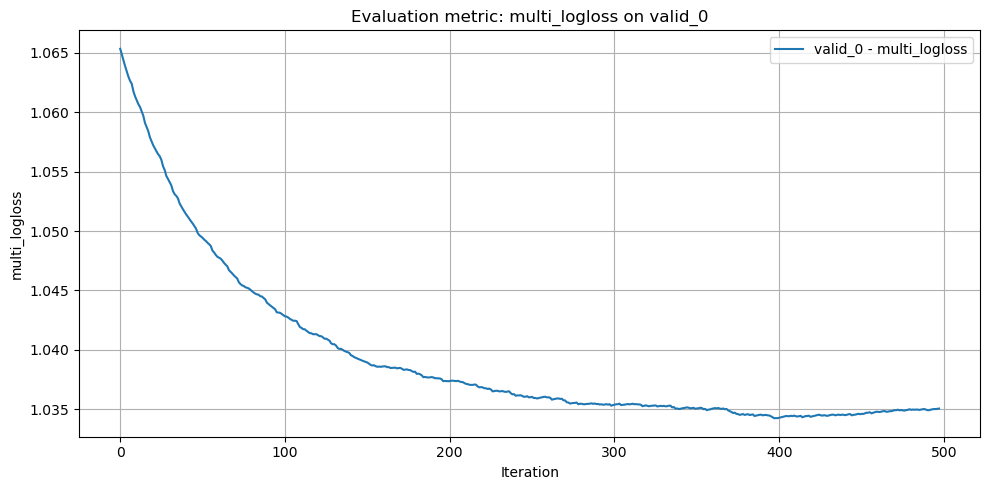

In [36]:
for data_name, metrics in results.items():
    for metric_name, values in metrics.items():
        plt.figure(figsize=(10, 5))
        plt.plot(values, label=f"{data_name} - {metric_name}")
        plt.title(f"Evaluation metric: {metric_name} on {data_name}")
        plt.xlabel("Iteration")
        plt.ylabel(metric_name)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [37]:
y_pred = model.predict(X_testing)

NameError: name 'X_testing' is not defined

In [ ]:
print("Accuracy:", accuracy_score(y_testing, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.43241333950451877
Classification Report:
               precision    recall  f1-score   support

         bad       0.37      0.09      0.15     13695
        good       0.45      0.79      0.57     17934
     neutral       0.38      0.25      0.30      9422

    accuracy                           0.43     41051
   macro avg       0.40      0.38      0.34     41051
weighted avg       0.41      0.43      0.37     41051

